Oil and Gas Machine Learning Project

Problem Statement:
To build a machine learning regression model that predicts oil production rates based on key operational parameters such as pressure, temperature, flow time, and other relevant field data.

In [5]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv(r'C:\Users\Administrator\Downloads\Volve P-12_DatesCorrected.csv',parse_dates=True,index_col=0)

In [7]:
df.head()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

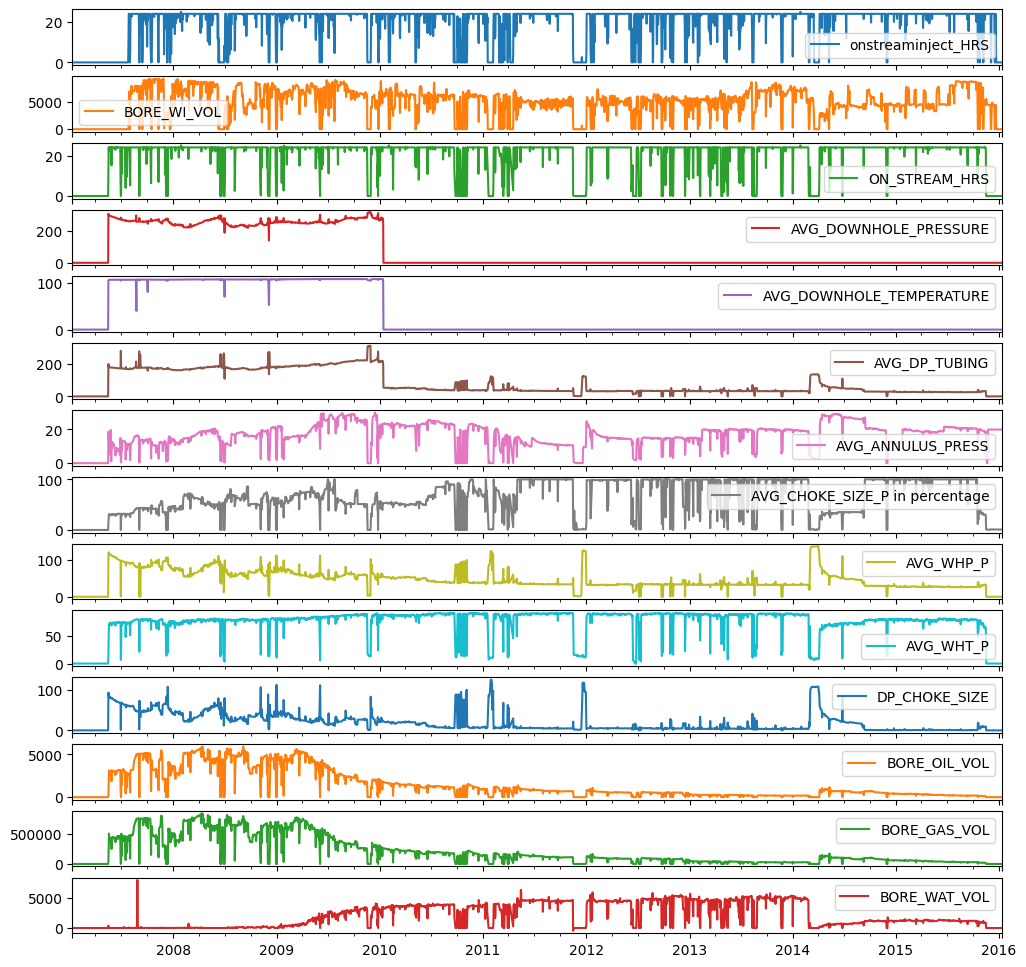

In [8]:
df.plot(subplots=True,figsize=(12,12))

In [9]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

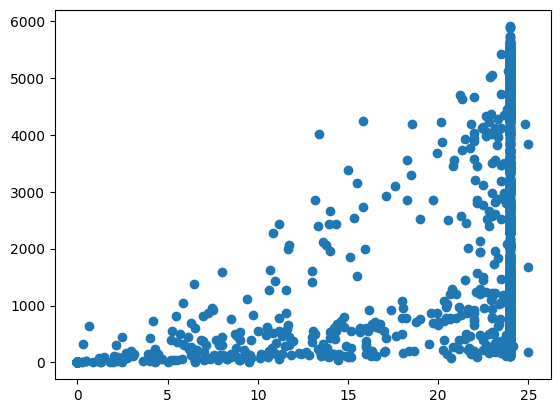

In [10]:
plt.scatter(df['ON_STREAM_HRS'],df['BORE_OIL_VOL'])

As the onstream hours increases, injection also increases

In [11]:
df.corr()['BORE_OIL_VOL']

onstreaminject_HRS                0.182405
BORE_WI_VOL                       0.368739
ON_STREAM_HRS                     0.361124
AVG_DOWNHOLE_PRESSURE             0.819920
AVG_DOWNHOLE_TEMPERATURE          0.850241
AVG_DP_TUBING                     0.778941
AVG_ANNULUS_PRESS                 0.163663
AVG_CHOKE_SIZE_P in percentage   -0.049757
AVG_WHP_P                         0.544204
AVG_WHT_P                         0.245750
DP_CHOKE_SIZE                     0.434375
BORE_OIL_VOL                      1.000000
BORE_GAS_VOL                      0.998661
BORE_WAT_VOL                     -0.364295
Name: BORE_OIL_VOL, dtype: float64

In [12]:
#confirm missing values
df.isnull().sum().sort_values()

onstreaminject_HRS                0
BORE_WI_VOL                       0
ON_STREAM_HRS                     0
AVG_DOWNHOLE_PRESSURE             0
AVG_DOWNHOLE_TEMPERATURE          0
AVG_DP_TUBING                     0
AVG_ANNULUS_PRESS                 0
AVG_CHOKE_SIZE_P in percentage    0
AVG_WHP_P                         0
AVG_WHT_P                         0
DP_CHOKE_SIZE                     0
BORE_OIL_VOL                      0
BORE_GAS_VOL                      0
BORE_WAT_VOL                      0
dtype: int64

In [13]:
#Descriptive statistis to analyze if and when outliers are there looking at max vs the IQR

In [14]:
df.describe()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000
mean,19.528256,4935.663628,20.017419,76.283155,31.424488,80.758924,16.368846,64.158081,45.803679,74.345872,18.657338,1402.086752,204365.771346,2105.660438
std,8.669803,2625.955533,8.303784,118.248271,48.547561,73.006429,7.197959,33.810811,25.954204,26.140866,22.896388,1642.492700,232710.410394,1952.495950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-458.000000
25%,21.670000,3972.500000,24.000000,0.000000,0.000000,32.235500,12.543000,40.983840,32.199000,76.549000,3.663500,211.000000,33259.000000,40.500000
50%,24.000000,5335.000000,24.000000,0.000000,0.000000,37.921250,18.019000,65.988040,37.464000,81.693000,6.819000,664.000000,101142.000000,1260.000000
75%,24.000000,6851.500000,24.000000,235.838500,105.919000,170.045500,20.587000,99.895675,59.079500,90.002500,26.760500,2026.000000,295593.000000,4109.000000
max,25.000000,9316.000000,25.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000


In [15]:
#There can only be 24 hours in a day not 25, so drop rows containing 25 hours
df=df[~((df['onstreaminject_HRS']>24) | (df['ON_STREAM_HRS']>24))]

In [16]:
#check the description again
df.describe()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000
mean,19.528156,4934.980523,20.010151,76.248428,31.407515,80.739807,16.368983,64.150011,45.792192,74.332348,18.651734,1401.124315,204234.223524,2104.673311
std,8.667956,2625.296333,8.307998,118.239572,48.539923,73.014296,7.201370,33.823954,25.962368,26.157294,22.903986,1642.212373,232677.045578,1951.967758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-458.000000
25%,21.670000,3971.750000,24.000000,0.000000,0.000000,32.234250,12.540000,40.918733,32.196750,76.573250,3.659000,211.000000,33254.000000,40.250000
50%,24.000000,5333.500000,24.000000,0.000000,0.000000,37.907125,18.019500,66.018195,37.424500,81.688500,6.815500,663.500000,101047.500000,1259.000000
75%,24.000000,6850.000000,24.000000,235.848250,105.919000,170.051250,20.587000,99.897703,59.039500,90.003750,26.731000,2023.000000,295347.250000,4104.500000
max,24.000000,9316.000000,24.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000


Machine Learning (Regression)

2. Columns- select input and Output Columns 
Use correlation Analysis as a quick-hack to do the same
Too high or too low correlation magnitudes need to be avoided

In [17]:
output_col='BORE_OIL_VOL'

<Axes: >

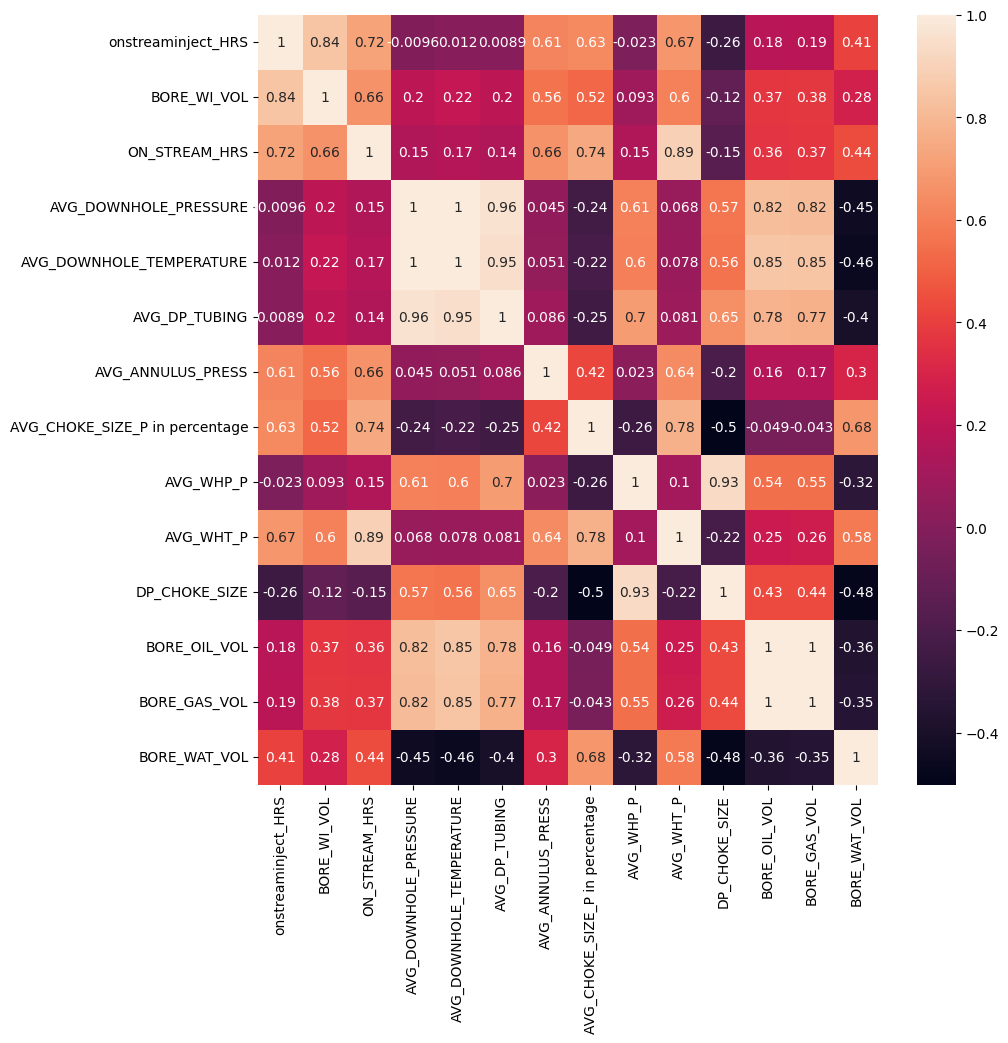

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Some features are fairly inter-related which breaks the assumption of linreg
Assumptions of Linear Regression
Linearity
The relationship between the independent variables (X) and the dependent variable (Y) is linear.
This means: a change in X leads to a proportional change in Y.

Independence
Observations (data points) are independent of each other.
This means: one data point does not influence another.

Homoscedasticity
 The variance of errors (residuals) is constant across all levels of the independent variables.
 In simple terms: the “spread” of prediction errors should be the same throughout.

Normality of Residuals
 The errors (differences between actual and predicted values) should be normally distributed.
 This matters especially when constructing confidence intervals or hypothesis tests.

No Multicollinearity
 Independent variables should not be highly correlated with each other.
 If two or more features are too similar, it becomes hard to isolate their individual effect on Y.

No Autocorrelation (especially in time series data)
 Residuals should not be correlated with each other over time.
 This is crucial in time-dependent data like oil productio

<Axes: >

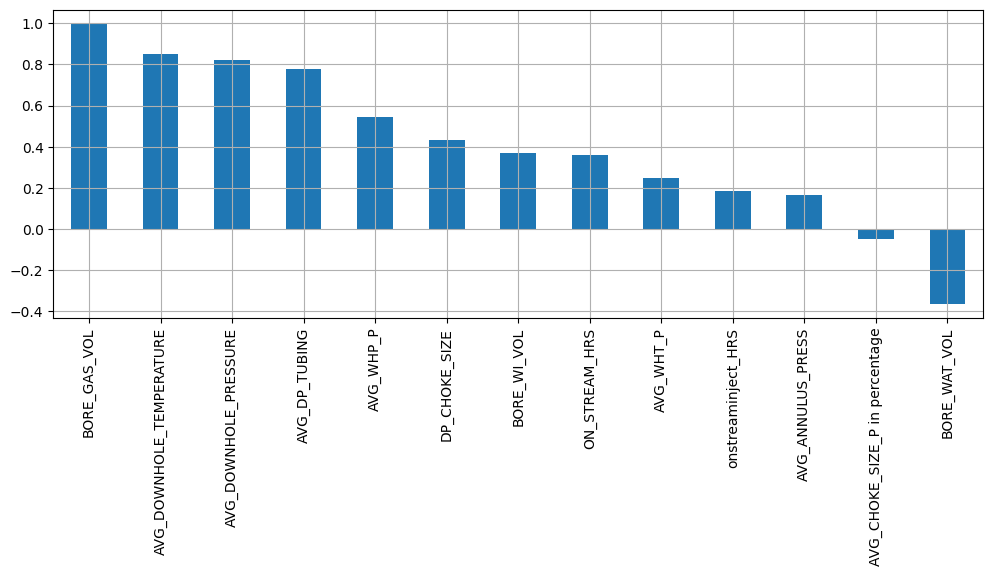

In [19]:
df.corr()[output_col].sort_values(ascending=False)[1:].plot(kind='bar',figsize=(12,4),grid=True)

#Bore_Gas_Vol, Downhole Temp and pressure and Tubing are highy correlated

2.1 Input Columns : Selecting features with good (but not extreme) correlations with output columns

In [20]:
#Put a correlation data in a pandas dataframe to separate the input variables whose correlation ar greater than 0.9 to avoid correlation
corr_df=pd.DataFrame(df.corr()[output_col].sort_values(ascending=False)[1:])

In [21]:
corr_df.columns=['corr']

In [22]:
input_columns=corr_df[(corr_df['corr']>0.2) & (corr_df['corr']<0.9)].index

In [23]:
input_columns

Index(['AVG_DOWNHOLE_TEMPERATURE', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_WHP_P', 'DP_CHOKE_SIZE', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_WHT_P'],
      dtype='object')

# 3. Name input matrix as X(Feature Matrix) and Output matrix as y(target)

In [24]:
X=df[input_columns]
y=df[output_col]

In [25]:
X.shape, y.shape

((3286, 8), (3286,))

Train-Test (or Validation) Split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_train.shape

(2628, 8)

5. Feature Scaling. Important for better Training (in select models).

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [29]:
#initialize scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

6. Training A Machine Learning Model.(select the best of them all)

6.1 Option 1: Multiple Linear Regression Model

In [30]:
#import libraries
from sklearn.linear_model import LinearRegression


In [31]:
#instantiate the model
lm=LinearRegression()

In [32]:
#fit the model to the training dataset
lm.fit(X_train_scaled,y_train)

LinearRegression()

In [33]:
#predict on the test data
yp_predict=lm.predict(X_train_scaled)

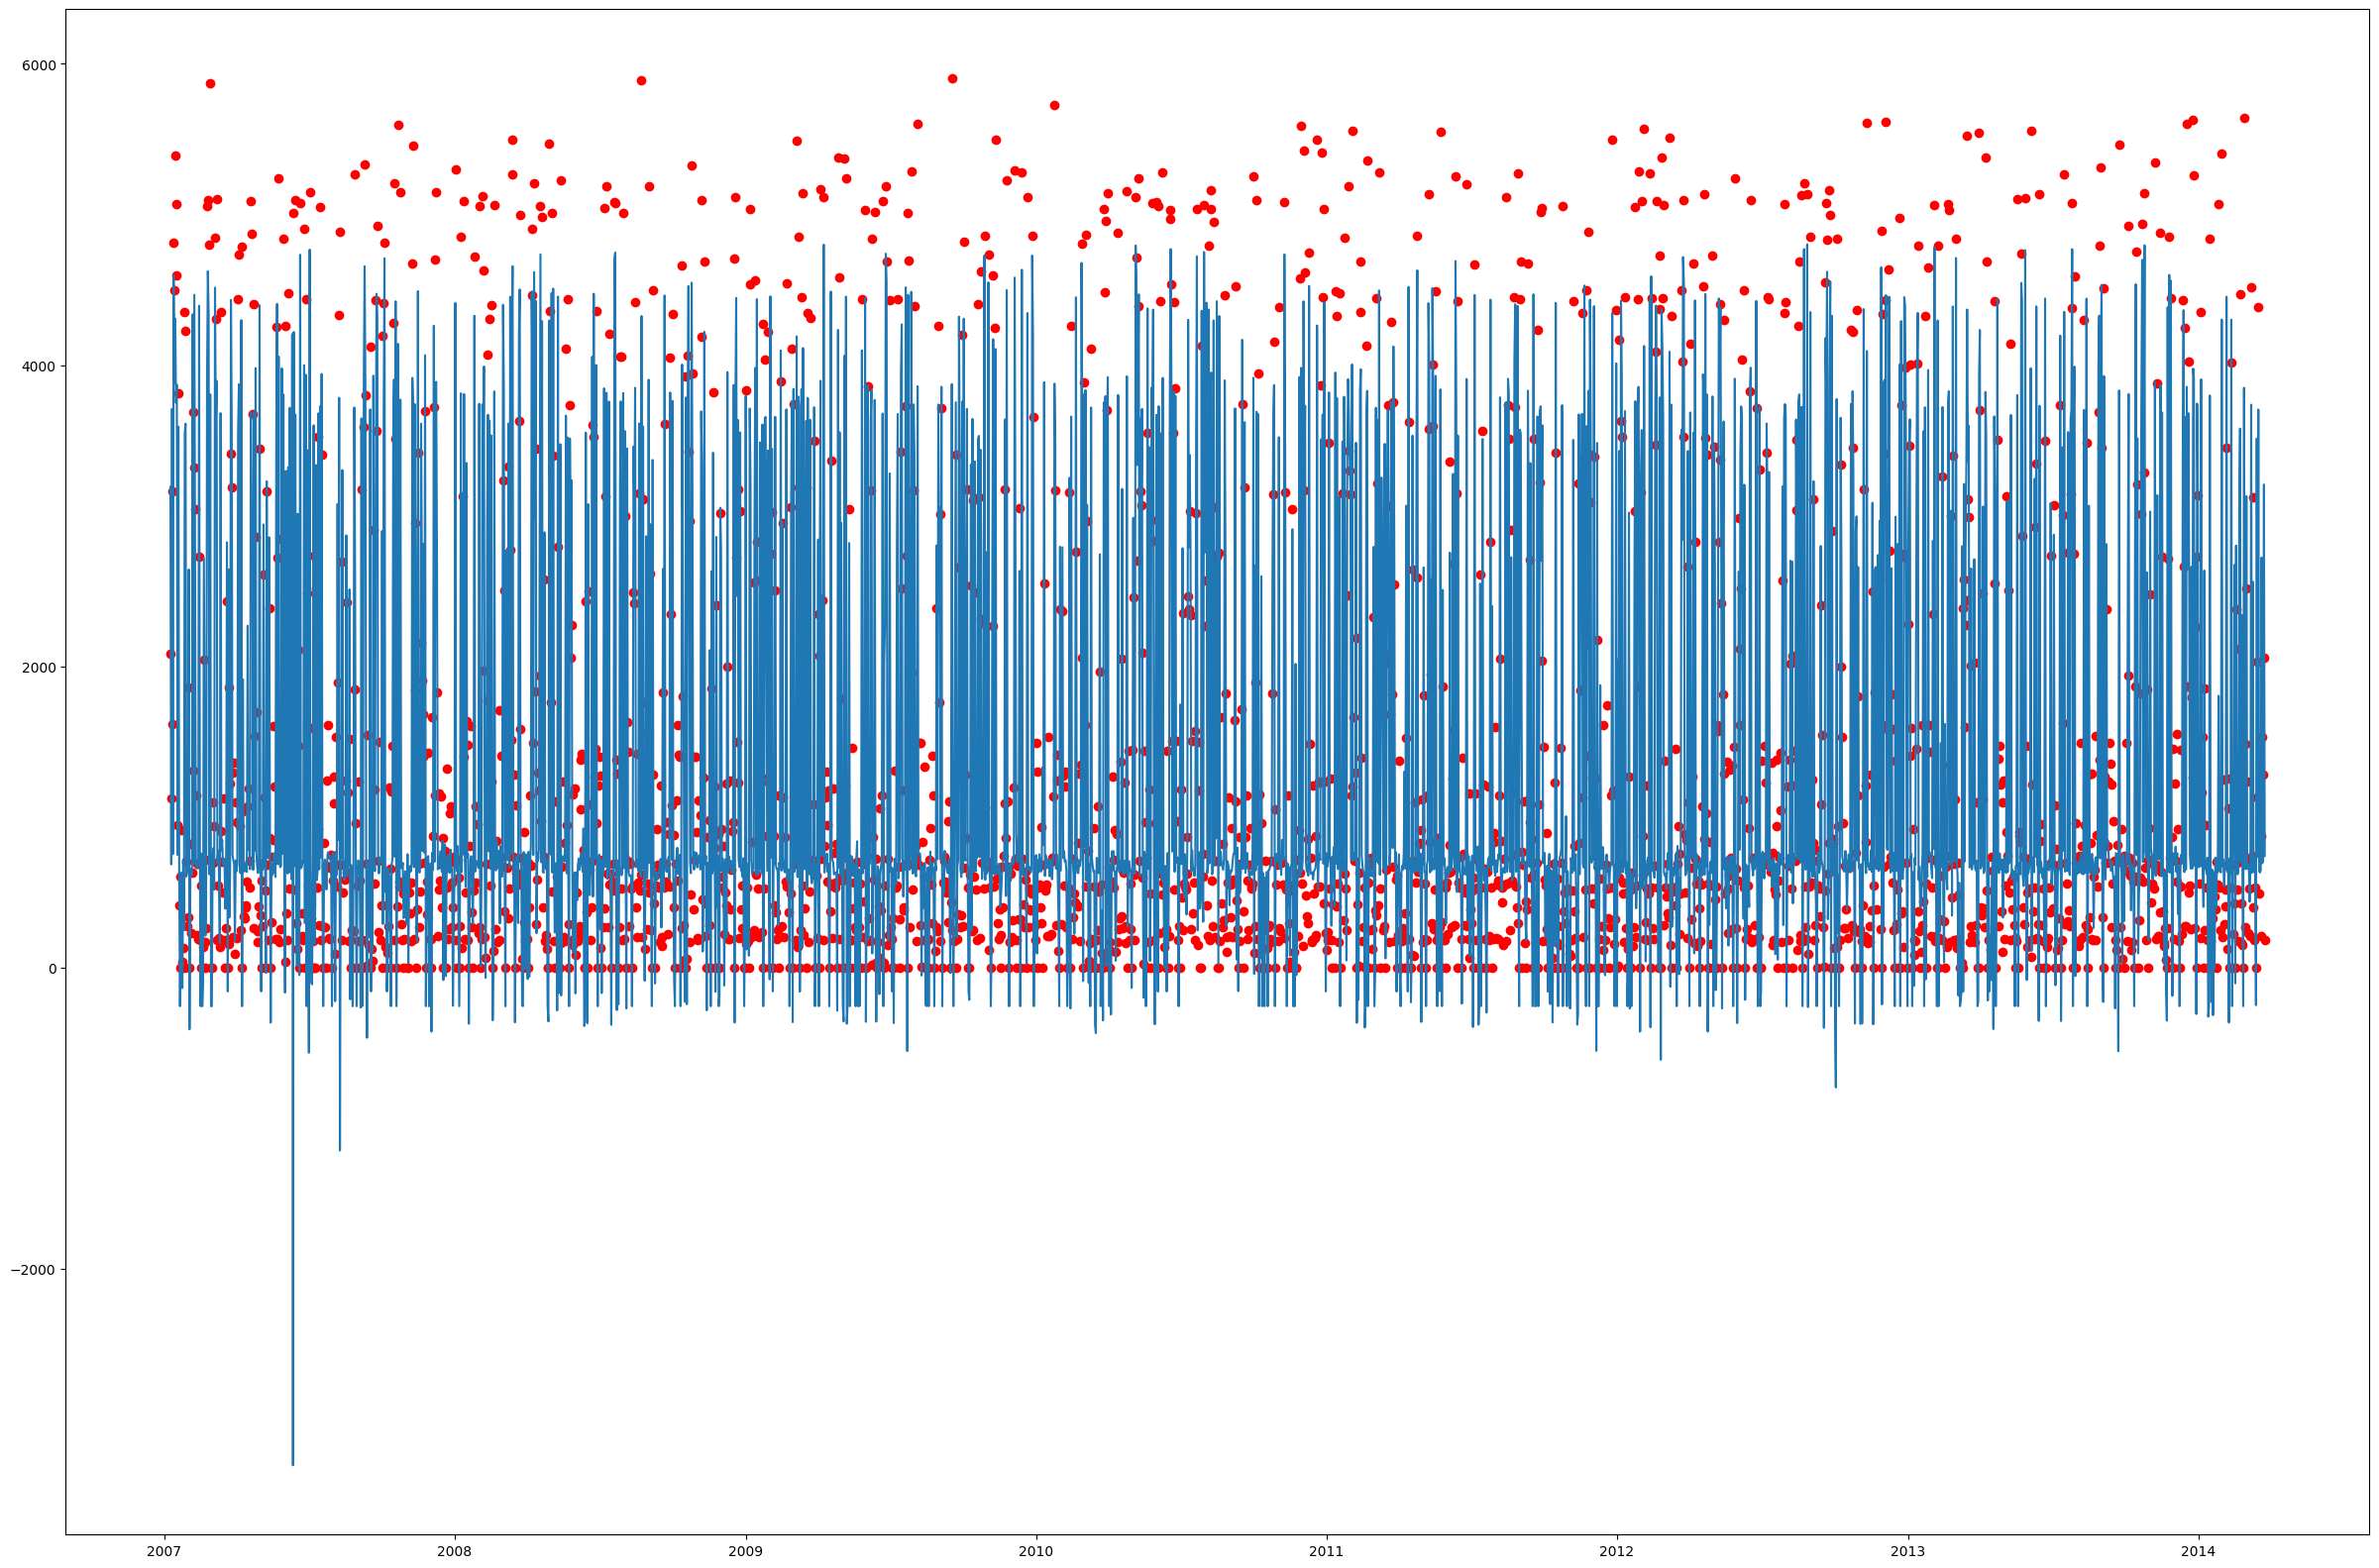

In [34]:
#plot a graph
train_length=len(X_train)
plt.figure(figsize=(30,20))
plt.scatter(df.index[:train_length],y_train,color='red')
plt.plot(df.index[:train_length],yp_predict)

In [35]:
#predictions on the testing data
y_pred_test=lm.predict(X_test_scaled)

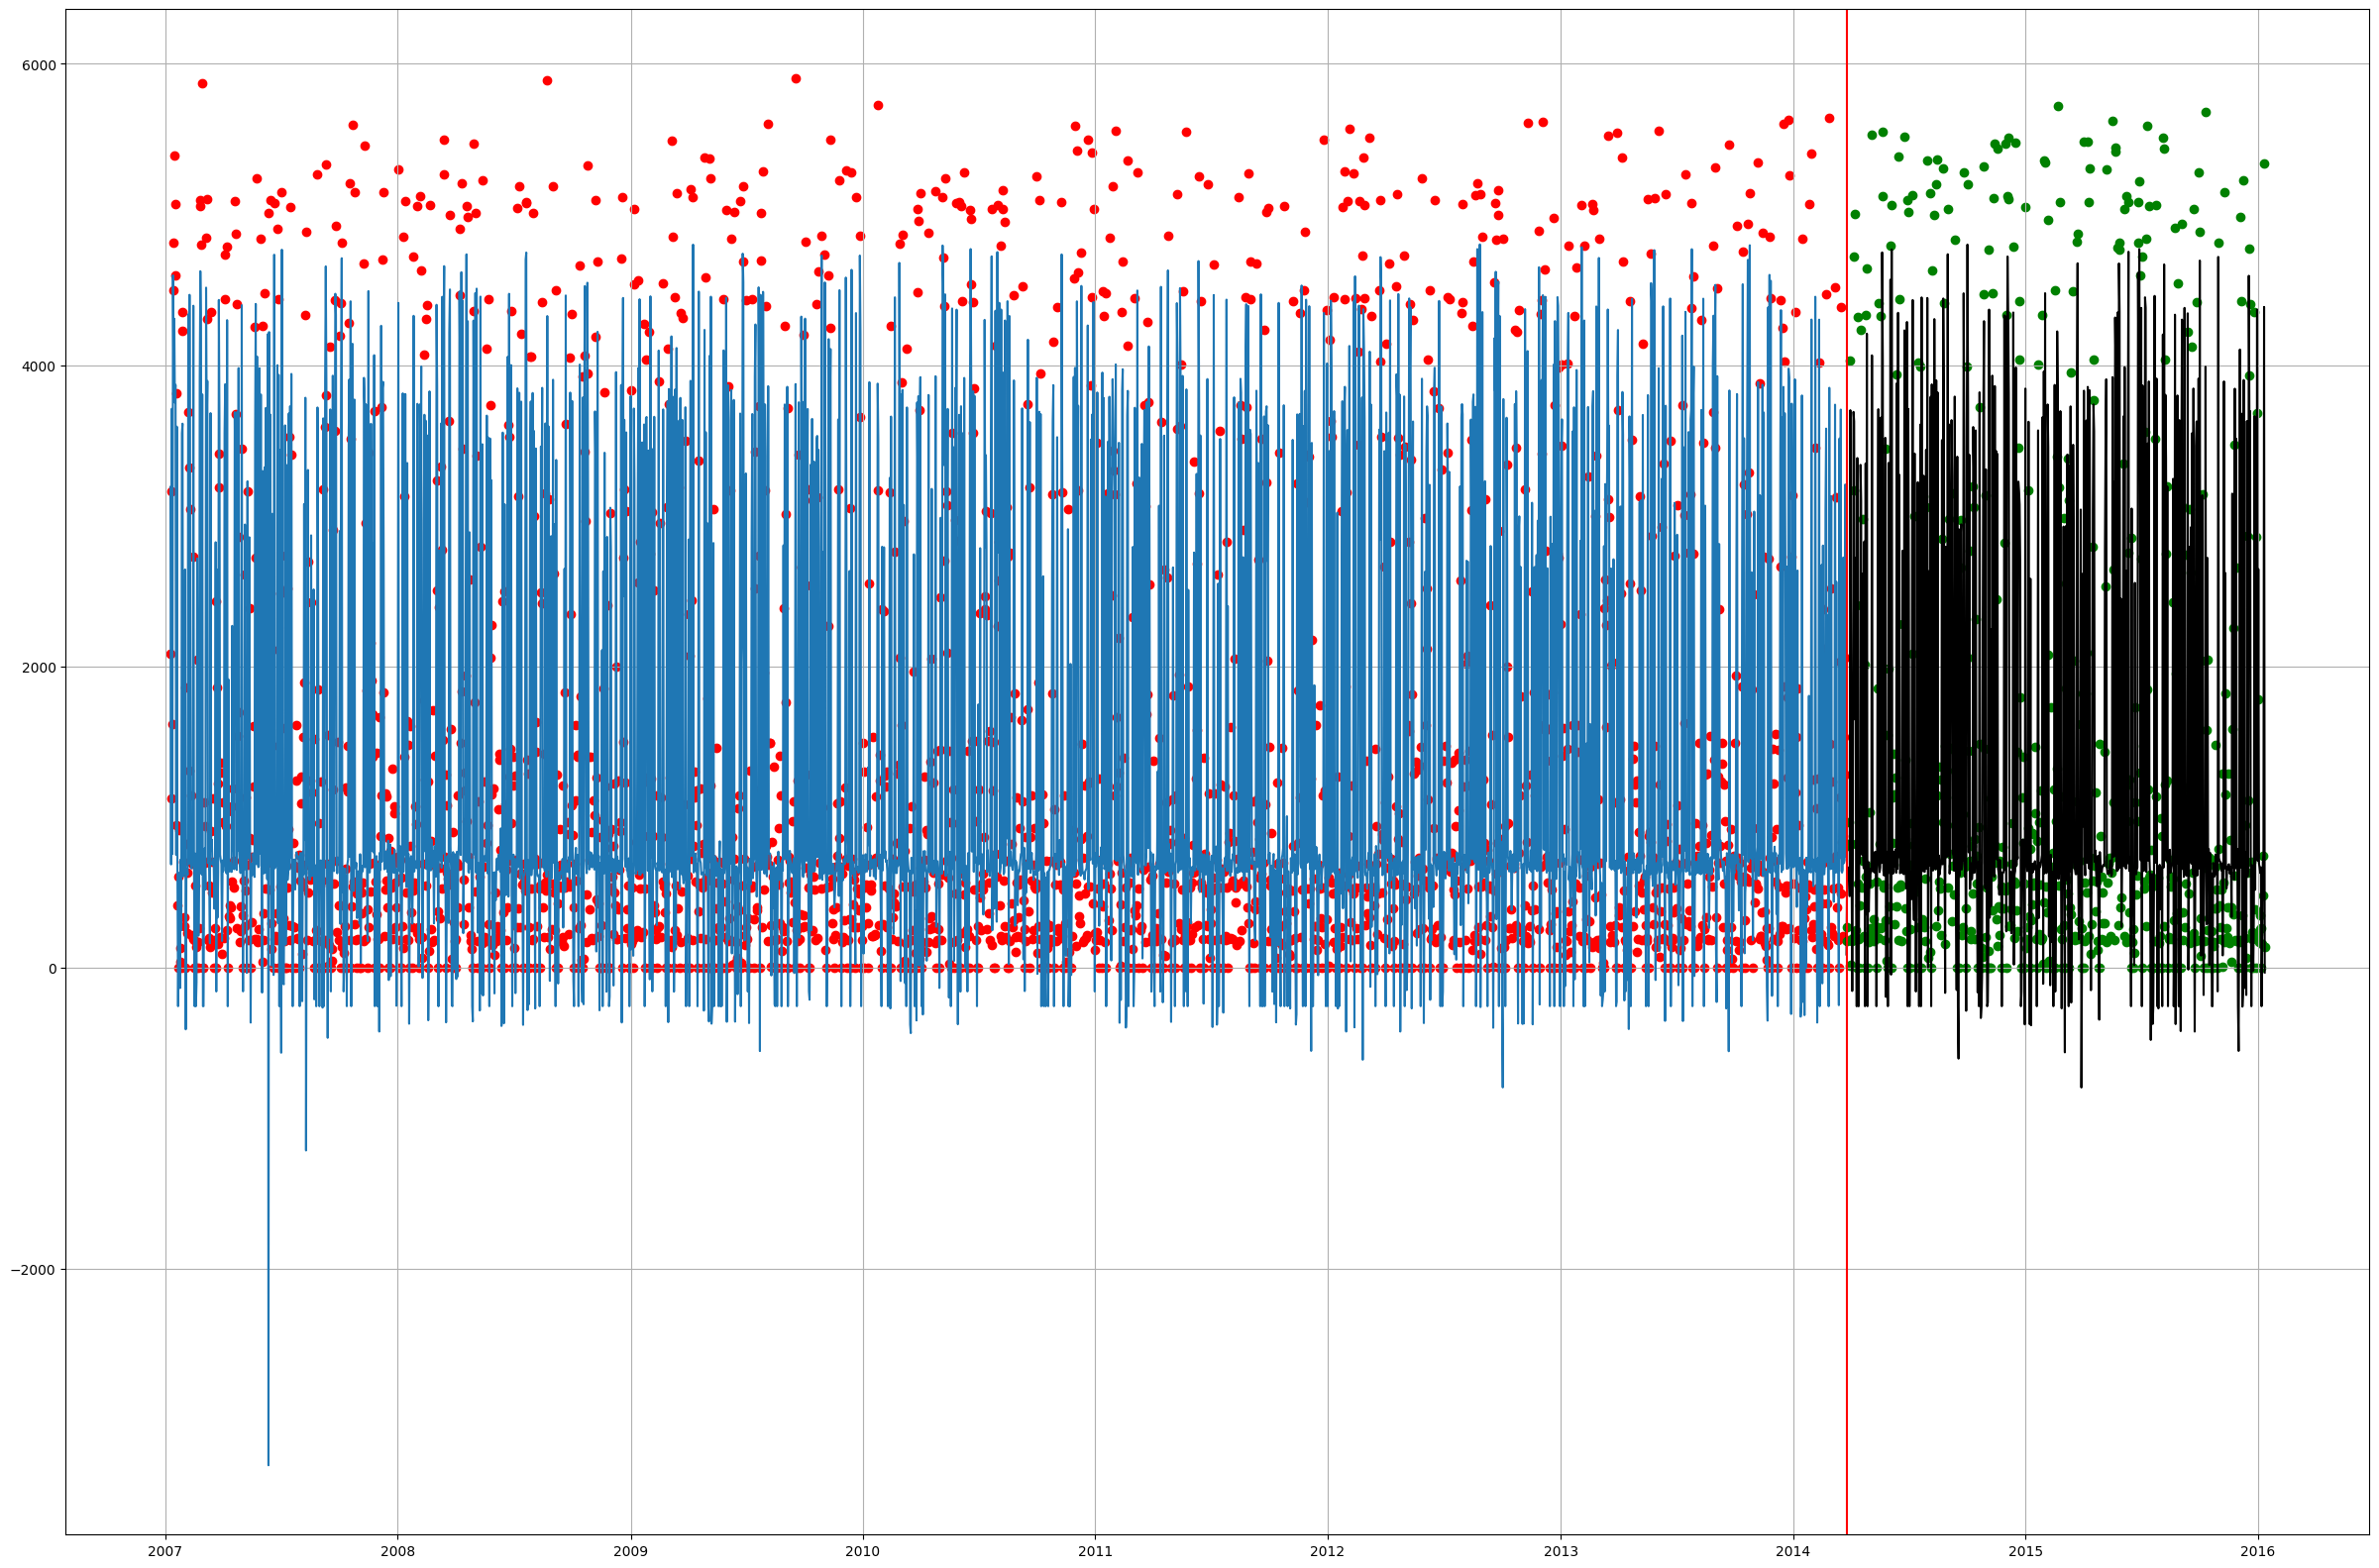

In [36]:
#plot a graph of the y_predict_test
plt.figure(figsize=(30,20))
plt.scatter(df.index[:train_length],y_train,color='red')
plt.plot(df.index[:train_length],yp_predict)
plt.scatter(df.index[train_length:],y_test,color='green')
plt.plot(df.index[train_length:],y_pred_test,color='black')
plt.axvline(df.index[train_length],color='red')
plt.grid()

# The model is producing a negative quantity of oil produced which is not real in real life scenario so the model is not accurate

#

# Option 2 RandomForest Regression Model

Scaling Not Required

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train,y_train)
yp_train=rf.predict(X_train)
yp_test=rf.predict(X_test)

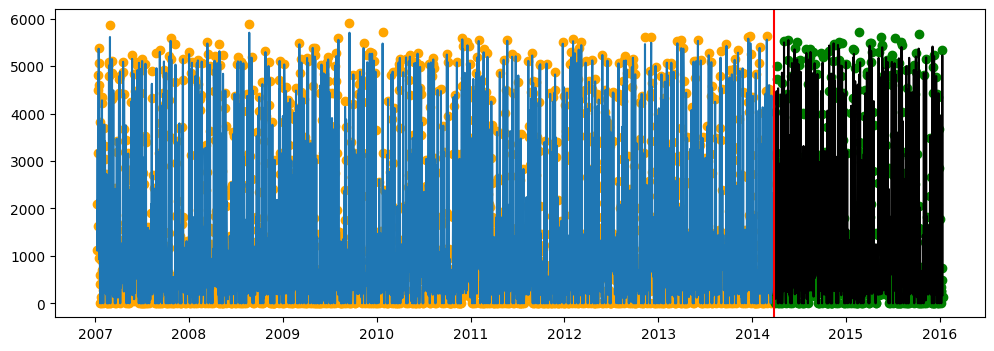

In [40]:
plt.figure(figsize=(12,4))
plt.scatter(df.index[:train_length],y_train,color='orange')
plt.plot(df.index[:train_length],yp_train)

plt.scatter(df.index[train_length:],y_test,color='green')
plt.plot(df.index[train_length:],yp_test,color='black')

plt.axvline(df.index[train_length],color='red')

# This is close to the actual training dataset

# 